In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

待求解方程为：$\ddot x = -2\xi\omega_n \dot x -\omega_n^2 x$，其中 $\omega_n^2 = \frac{k}{m}$，$\frac{c}{m}=2\xi\omega_n$

odeint求解二阶常微分方程的方法是首先把二阶常微分方程写作两个一阶常微分方程组

$x = u[0]$

$\dot x = u[1]$ 

本例中设：$k=1$，$m=1$，$\xi = [0.1, 0.5, 1.0, 1.2]$，初值条件为：$x(0) = 0$， $\dot x(0) = 3$

In [2]:
k = 1.0
m = 1.0
xi = 0.1
omega_n = k/m
c = 2*xi*omega_n*m
f = omega_n/(2.0*np.pi)
T = 1./f
print("自然频率为：" + '%g'%f + ' Hz')
print("固有周期为：" + '%g'%T + ' s')

自然频率为：0.159155 Hz
固有周期为：6.28319 s


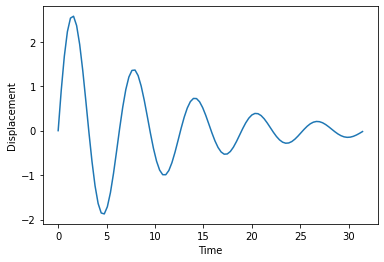

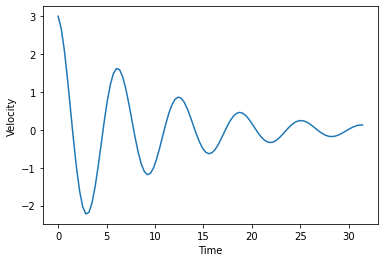

In [3]:
def x_derivatives(u, t):
    return [u[1], -2.0*xi*omega_n*u[1]-omega_n**2*u[0]]
x0 = [0, 3] # 初值条件 t = 0时刻，位移为0，速度为3
ts = np.linspace(0, 10.0*np.pi, 100)
us = odeint(x_derivatives, x0, ts)
xs = us[:,0]
vs = us[:,1]
plt.plot(ts, xs)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()
#
plt.plot(ts, vs)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()